The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes. The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv(r'C:\Users\sisir.sahu\Downloads\Machine Learning\SVC\framingham.csv')

In [4]:
data1 = data.copy()

In [5]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
# Since education has no role in heart risk, dropping that feature.

data.drop('education', axis = 1, inplace = True)

In [7]:
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
data.dropna(subset = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'BPMeds'],inplace = True)

In [9]:
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            339
TenYearCHD           0
dtype: int64

<AxesSubplot:>

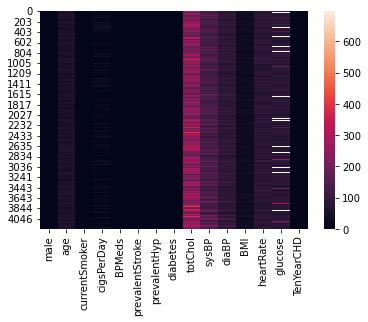

In [10]:
sns.heatmap(data=data)

C:\Users\sisir.sahu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='glucose'>

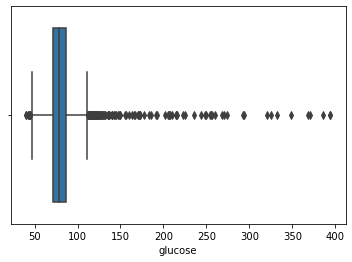

In [11]:
sns.boxplot(data['glucose'])

In [12]:
#Lets try to fill glucose null values 
data['glucose'].fillna(data['glucose'].median(), inplace = True)

In [13]:
#Split data into x and y    
x = data.iloc[:, :-1]
y = data.iloc[:, -1].values

y = y.reshape(-1, 1)

In [14]:
#split x and y into training and test dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [15]:
#Scale the x train and test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test =  scaler.transform(x_test)

In [16]:
#Import SVC classification model
from sklearn.svm import SVC
classifier = SVC()

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

C:\Users\sisir.sahu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [17]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[691   0]
 [124   3]]


In [18]:
#Accuracy Score or Recall
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
ac

0.8484107579462102

In [19]:
#Classification report
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      1.00      0.92       691\n           1       1.00      0.02      0.05       127\n\n    accuracy                           0.85       818\n   macro avg       0.92      0.51      0.48       818\nweighted avg       0.87      0.85      0.78       818\n'

In [21]:
bias = classifier.score(x_train, y_train) #Bias
variance = classifier.score(x_test, y_test)  #Variance

print(bias, variance, ac)

0.8614678899082568 0.8484107579462102 0.8484107579462102
